In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-09-23 06:01:10--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   119MB/s    in 0.5s    

2020-09-23 06:01:11 (119 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
import os
import zipfile

zip = '/tmp/cats_and_dogs_filtered.zip'
zip_dir = zipfile.ZipFile(zip,'r')
zip_dir.extractall('/tmp')
zip_dir.close()

In [5]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [7]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

print(train_cats_fnames[:10])
print(train_dogs_fnames[:10])

['cat.703.jpg', 'cat.234.jpg', 'cat.214.jpg', 'cat.505.jpg', 'cat.151.jpg', 'cat.373.jpg', 'cat.187.jpg', 'cat.300.jpg', 'cat.283.jpg', 'cat.241.jpg']
['dog.531.jpg', 'dog.345.jpg', 'dog.611.jpg', 'dog.399.jpg', 'dog.539.jpg', 'dog.424.jpg', 'dog.67.jpg', 'dog.303.jpg', 'dog.233.jpg', 'dog.526.jpg']


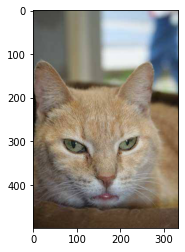

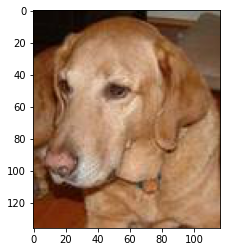

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
idx = np.random.randint(0,100)
cat_image = mpimg.imread(train_cats_dir+"/"+train_cats_fnames[idx])
dog_image = mpimg.imread(train_dogs_dir+"/"+train_dogs_fnames[idx])
plt.imshow(cat_image)
plt.figure()
plt.imshow(dog_image)

In [17]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), input_shape=(150,150,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [19]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale=1/255)
validation_generator = ImageDataGenerator(rescale=1/255)

train_datagen = train_generator.flow_from_directory(
    train_dir,
    batch_size=20,
    target_size=(150,150),
    class_mode='binary'
)

validation_datagen = validation_generator.flow_from_directory(
    validation_dir,
    batch_size=20,
    target_size=(150,150),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit(
    train_datagen, validation_data=validation_datagen,
    epochs=15,
    steps_per_epoch=100,
    validation_steps=50,
    verbose=2

)

Epoch 1/15
100/100 - 9s - loss: 0.7714 - accuracy: 0.5460 - val_loss: 0.6448 - val_accuracy: 0.6410
Epoch 2/15
100/100 - 9s - loss: 0.6159 - accuracy: 0.6785 - val_loss: 0.5855 - val_accuracy: 0.6960
Epoch 3/15
100/100 - 9s - loss: 0.5497 - accuracy: 0.7305 - val_loss: 0.5967 - val_accuracy: 0.6830
Epoch 4/15
100/100 - 9s - loss: 0.4773 - accuracy: 0.7735 - val_loss: 0.5549 - val_accuracy: 0.7310
Epoch 5/15
100/100 - 9s - loss: 0.3917 - accuracy: 0.8165 - val_loss: 0.5956 - val_accuracy: 0.7230
Epoch 6/15
100/100 - 9s - loss: 0.3421 - accuracy: 0.8500 - val_loss: 0.6948 - val_accuracy: 0.7200
Epoch 7/15
100/100 - 9s - loss: 0.2496 - accuracy: 0.8970 - val_loss: 0.6602 - val_accuracy: 0.7250
Epoch 8/15
100/100 - 9s - loss: 0.1723 - accuracy: 0.9300 - val_loss: 0.8579 - val_accuracy: 0.7330
Epoch 9/15
100/100 - 9s - loss: 0.1416 - accuracy: 0.9480 - val_loss: 0.8661 - val_accuracy: 0.7230
Epoch 10/15
100/100 - 9s - loss: 0.0789 - accuracy: 0.9730 - val_loss: 1.1742 - val_accuracy: 0.7090

Saving 92E141F8-36E4-4331-BB2EE42AC8674DD3_source.jpg to 92E141F8-36E4-4331-BB2EE42AC8674DD3_source (1).jpg
[0.]
92E141F8-36E4-4331-BB2EE42AC8674DD3_source.jpg is a cat


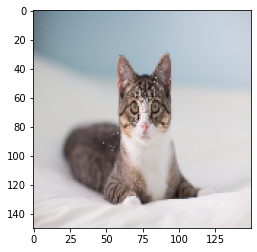

In [26]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  plt.imshow(img)
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

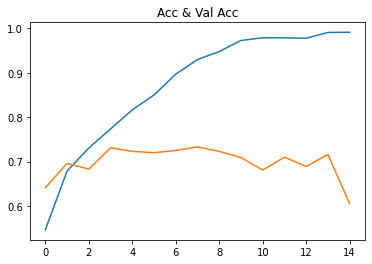

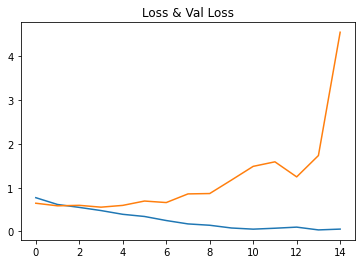

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [x for x in range(len(history.history['accuracy']))]

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Acc & Val Acc')
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss & Val Loss')
plt.show()